# Data Processing - Assignment 6

In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
svc = svm.SVC()
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, chi2, f_classif,  mutual_info_classif
from sklearn.feature_selection import SelectFpr, SelectFwe, GenericUnivariateSelect

### Task 1 (20 points)

In [2]:
spam_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data")
spam_df.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_semi_colon','char_freq_open_round_bracket','char_freq_open_square_bracket','char_freq_exclamatory_mark','char_freq_dollar_sign','char_freq_hashtag','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam_or_ham']
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semi_colon,char_freq_open_round_bracket,char_freq_open_square_bracket,char_freq_exclamatory_mark,char_freq_dollar_sign,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_or_ham
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


<function matplotlib.pyplot.show(close=None, block=None)>

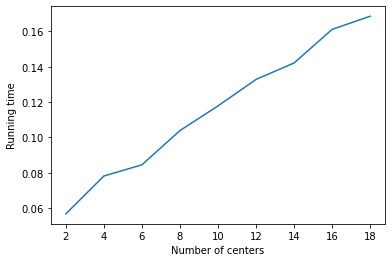

In [3]:
# Training time vs the number of centers when all the dataset is used.

times = []
center = []

for centers in range (2,20,2) :
    start = time.time()
    km = KMeans(centers)
    km.fit(spam_df)
    times.append(time.time()-start)
    center.append(centers)
    
plt.plot(center, times) 
plt.xlabel("Number of centers")
plt.ylabel("Running time") 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

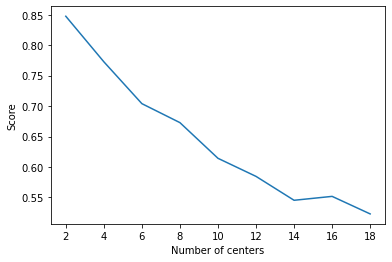

In [4]:
# Clustering score vs the number of centers when all the dataset is used.

sil_scores = []
center = []

for centers in range (2,20,2) :
    km = KMeans(centers)
    km.fit(spam_df)
    sil_score = silhouette_score(spam_df, km.labels_, metric='euclidean')
    center.append(centers)
    sil_scores.append(sil_score)
    
plt.plot(center, sil_scores) 
plt.xlabel("Number of centers")
plt.ylabel("Score") 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

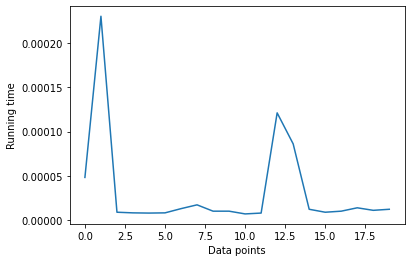

In [5]:
# Training time vs the number of data points when the number of centers is set to 15.

times = []
data_points = []

k = 3
d = 5
center = 15
X = np.zeros((0,d)) 
for n in range(20):
    start = time.time()
    X = np.concatenate([ X, np.random.randn(n, d) + center])
    times.append(time.time()-start)
    data_points.append(n)
    
plt.plot(data_points, times) 
plt.xlabel("Data points")
plt.ylabel("Running time") 
plt.show

### Task 2 (20 points)

In [6]:
feature_names = load_iris().feature_names
X = pd.DataFrame(load_iris().data, columns=feature_names)
y = load_iris().target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
n = 100
d = 4
y[ y < 1] =0
y[ y >= 1] = 1
score_funcs = [ chi2, f_classif, mutual_info_classif ]
transformers = [VarianceThreshold( threshold = (0.01) )]
transformers +=[SelectKBest( score_func, k = k )
                for score_func in score_funcs
                  for k in range(1,d)]
transformers +=[SelectPercentile( score_func, percentile = p )
                for score_func in score_funcs
                  for p in range(1,100,20)]

for transformer in transformers:
    transformer.fit(X, y)
    result = transformer.get_support()
    X_new = transformer.transform(X)
    transName = str(transformer)
    transName = transName[:transName.find("(")]
    print(transName,X_new.shape, result)
    
# 1: petal length, 2: petal width, 3: sepal length, 4: sepal width

VarianceThreshold (150, 4) [ True  True  True  True]
SelectKBest (150, 1) [False False  True False]
SelectKBest (150, 2) [False False  True  True]
SelectKBest (150, 3) [ True False  True  True]
SelectKBest (150, 1) [False False  True False]
SelectKBest (150, 2) [False False  True  True]
SelectKBest (150, 3) [ True False  True  True]
SelectKBest (150, 1) [False False False  True]
SelectKBest (150, 2) [False False  True  True]
SelectKBest (150, 3) [ True False  True  True]
SelectPercentile (150, 1) [False False  True False]
SelectPercentile (150, 1) [False False  True False]
SelectPercentile (150, 2) [False False  True  True]
SelectPercentile (150, 2) [False False  True  True]
SelectPercentile (150, 3) [ True False  True  True]
SelectPercentile (150, 1) [False False  True False]
SelectPercentile (150, 1) [False False  True False]
SelectPercentile (150, 2) [False False  True  True]
SelectPercentile (150, 2) [False False  True  True]
SelectPercentile (150, 3) [ True False  True  True]
Sele

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(


In [8]:
n = 100
d = 4
y[ y < 1] =0
y[ y >= 1] = 1

score_funcs = [ chi2, f_classif,]
transformers = [ VarianceThreshold( threshold = (0.01) )]
transformers += [SelectFpr(score_func, alpha = 5e-4 ) for score_func in score_funcs]
transformers += [SelectFwe(score_func, alpha = 5e-4 ) for score_func in score_funcs]

for transformer in transformers:
    transformer.fit(X, y)
    result = transformer.get_support()
    X_new = transformer.transform(X)
    transName = str(transformer)
    transName = transName[:transName.find("(")]
    print(transName,X_new.shape, result)
    
# These other methods display the same results as that of the ones used in the previous paragraph of the question.

VarianceThreshold (150, 4) [ True  True  True  True]
SelectFpr (150, 2) [False False  True  True]
SelectFpr (150, 4) [ True  True  True  True]
SelectFwe (150, 2) [False False  True  True]
SelectFwe (150, 4) [ True  True  True  True]


### Task 3 (10 points)

In [9]:
# Trying different values of n

n = [7,8,9,10,11,12,13,14,15,16,17,18,19,20]
scr = []

for i in n:
    d = 2
    X = np.random.rand(i,d)
    y = np.zeros((i))
    y[ X[:,0] < X[:,1] ] = 1
    estimator = SVC(kernel='linear')
    score = cross_val_score(estimator, X, y).mean()
    scr.append(round(score,3))

print ("Degrees:")
print (n)
print ("\nScores:")
print (scr)

'''
Higher values of n will give a varying accuracy which are all above 0.6. 
The accuracy of binary classification was noted to be 1 for one of the n value above 10 a few times.
n value (dimensions) cannot be 0 or negative.
n value of 1 to 6 show the following error:n_splits=5 cannot be greater than the number of members in each class.
''' 

Degrees:
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Scores:
[nan, 0.7, 0.7, 0.6, 0.767, 0.567, 0.9, 0.867, 0.933, 0.75, 0.883, 0.717, 0.95, 0.85]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 720, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one;

'\nHigher values of n will give a varying accuracy which are all above 0.6. \nThe accuracy of binary classification was noted to be 1 for one of the n value above 10 a few times.\nn value (dimensions) cannot be 0 or negative.\nn value of 1 to 6 show the following error:n_splits=5 cannot be greater than the number of members in each class.\n'

In [10]:
# Trying the regressor line of code with different degree values
# Modifying the code to record the time

dg = [1,2,3,4,5,6,7,8,9,10]
scr = []
times = []

for i in dg:
    start = time.time()
    n = 10
    d = 2
    X = np.random.rand(n,d)
    y = np.zeros((n))
    y[ X[:,0] < X[:,1] ] = 1
    regressor = make_pipeline(PolynomialFeatures(degree = i), Ridge())
    score = cross_val_score(regressor, X, y).mean()
    times.append(round(time.time()-start,3))
    scr.append(round(score,3))
    
print ("Degrees:",dg)
print ("\nScores:",scr)
print ("\nTime:",times)

Degrees: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Scores: [0.434, 0.288, 0.447, 0.186, 0.257, 0.106, 0.43, 0.272, 0.411, 0.294]

Time: [0.006, 0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004]


<function matplotlib.pyplot.show(close=None, block=None)>

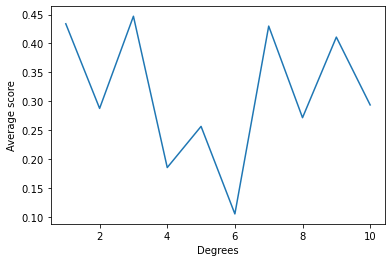

In [11]:
# Reporting the dependency of average score and degree

''' The plot shows that it is hard to predict the exact pattern of 
dependency between avg score and degree values. It somehow has a random 
increasing and decreasing inconsistent dependency pattern.
'''
plt.plot (dg, scr) 
plt.xlabel("Degrees")
plt.ylabel("Average score") 
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

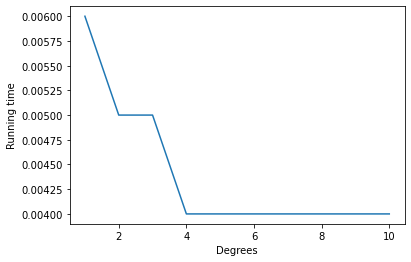

In [12]:
# Reporting the dependency of run time and degree

'''As degree value increases, the run time decreases.'''

plt.plot (dg, times) 
plt.xlabel("Degrees")
plt.ylabel("Running time") 
plt.show